In [1]:
import pandas as pd

In [4]:
## 顧客データ
## 興味 1 ~ 5

user = pd.read_csv('./data/User.csv')
user

,UserID,Gender,Age,Sports,Outdoors,Reading,Music,Movie,Fashion,Crafts,Cooking
0,U000001,M,44,3,5,2,1,1,1,5,3
1,U000002,F,36,3,5,1,1,1,1,5,3
2,U000003,F,29,4,5,1,3,1,2,2,1
3,U000004,M,37,2,1,3,3,3,1,1,5
4,U000005,F,37,3,5,1,1,2,2,5,2
...,...,...,...,...,...,...,...,...,...,...,...
3523,U003524,F,30,1,1,3,3,3,5,1,1
3524,U003525,F,36,2,5,2,1,1,1,5,3
3525,U003526,F,47,2,1,3,3,3,1,1,5
3526,U003527,M,23,1,1,3,3,3,5,1,1


In [142]:
## 購入データ
def replace_month(m):
    if m == 'Jan':
        return '01'
    elif m == 'Feb':
        return '02'
    elif m == 'Mar':
        return '03'
    elif m == 'Apr':
        return '04'
    elif m == 'May':
        return '05'
    elif m == 'Jun':
        return '06'
    elif m == 'Jul':
        return '07'
    elif m == 'Aug':
        return '08'
    elif m == 'Sep':
        return '09'
    elif m == 'Oct':
        return '10'
    elif m == 'Nov':
        return '11'
    elif m == 'Dec':
        return '12'

tran = pd.read_csv('./data/Tran.csv')
tran['Month'] = tran['Month'].apply(lambda month: replace_month(month))
tran

,UserID,Month,Amount
0,U000001,11,21000
1,U000003,04,37000
2,U000003,10,2000
3,U000003,12,2000
4,U000004,02,2000
...,...,...,...
6536,U003526,06,2000
6537,U003527,02,1000
6538,U003527,06,89000
6539,U003527,07,105000


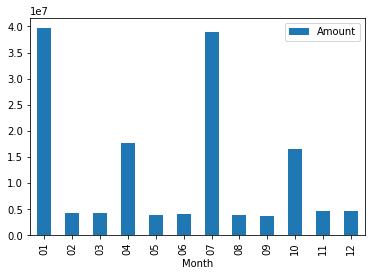

In [144]:
## 月ごとの購入額を分析
tran_month_sum = tran.groupby('Month').sum()
tran_month_sum.plot(y='Amount', kind='bar');

In [145]:
## 広告データ

AsMaster = pd.read_csv('./data/AdMaster_June.csv')
AsMaster

,UserID,isAd
0,U000001,0
1,U000003,0
2,U000004,0
3,U000005,0
4,U000006,0
...,...,...
3098,U003524,0
3099,U003525,0
3100,U003526,0
3101,U003527,0


In [146]:
## 広告やAmountに対して欠損値が含まれているので分析してみる
user_master = pd.merge(user, AsMaster, on='UserID', how='outer')
user_tran = pd.merge(user, tran.groupby('UserID').sum(), on='UserID', how='outer')

print('広告がNaNであるユーザ数：', user_master['isAd'].isnull().sum())
print('購入金額がNaNであるユーザ数：', user_tran['Amount'].isnull().sum())

# 広告がないユーザ　＝ 購入金額がないユーザ
# これらは '無効なユーザ'　として処理することとする

広告がNaNであるユーザ数： 425
購入金額がNaNであるユーザ数： 425


In [147]:
### データのマージ

#### 広告がないユーザ 　→　無効なユーザ

user_tran = pd.merge(user, tran.groupby('UserID').sum(), on='UserID', how="inner")
df = pd.merge(user_tran, AsMaster, on='UserID', how='inner')

df

,UserID,Gender,Age,Sports,Outdoors,Reading,Music,Movie,Fashion,Crafts,Cooking,Amount,isAd
0,U000001,M,44,3,5,2,1,1,1,5,3,21000,0
1,U000003,F,29,4,5,1,3,1,2,2,1,41000,0
2,U000004,M,37,2,1,3,3,3,1,1,5,3000,0
3,U000005,F,37,3,5,1,1,2,2,5,2,27000,0
4,U000006,F,29,1,1,3,3,3,5,1,1,103000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3098,U003524,F,30,1,1,3,3,3,5,1,1,209000,0
3099,U003525,F,36,2,5,2,1,1,1,5,3,66000,0
3100,U003526,F,47,2,1,3,3,3,1,1,5,2000,0
3101,U003527,M,23,1,1,3,3,3,5,1,1,195000,0


In [148]:
# データの確認作業

print("データ件数(広告あり)：", len(AsMaster)==len(df))
print("購入金額：", (tran.loc[:, 'Amount'].sum())==(df.loc[:, 'Amount'].sum()))
print("isAd合計値：", (AsMaster.loc[:, 'isAd'].sum())==(df.loc[:, 'isAd'].sum()))

データ件数(広告あり)： True
購入金額： True
isAd合計値： True


In [149]:
### データ全体に対しての統計値

df.describe()

,Age,Sports,Outdoors,Reading,Music,Movie,Fashion,Crafts,Cooking,Amount,isAd
count,3103.000000,3103.000000,3103.000000,3103.000000,3103.000000,3103.000000,3103.000000,3103.000000,3103.000000,3103.000000,3103.000000
mean,35.054786,2.515952,2.987432,2.107960,2.554947,2.097970,2.129874,2.115694,2.549468,47036.738640,0.102159
std,7.244792,1.521283,1.847726,0.963357,0.861899,0.973242,1.621370,1.624429,1.530704,54789.703496,0.302906
min,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1000.000000,0.000000
25%,30.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,8000.000000,0.000000
50%,35.000000,2.000000,2.000000,2.000000,3.000000,2.000000,1.000000,1.000000,2.000000,25000.000000,0.000000
75%,40.000000,4.000000,5.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,74500.000000,0.000000
max,56.000000,5.000000,5.000000,4.000000,4.000000,4.000000,5.000000,5.000000,5.000000,525000.000000,1.000000


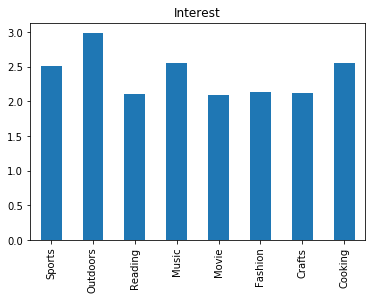

In [150]:
## 平均値
mean = df.describe().loc['mean']
mean.iloc[1:9].plot(kind='bar', title='Interest');

* OutSportが高いが他に顕著な特徴はない

In [151]:
## 広告に関して
df.describe().loc[:, 'isAd']

count    3103.000000
mean        0.102159
std         0.302906
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: isAd, dtype: float64

* 10％くらいに効果がある

In [152]:
## 広告で反応があったユーザについて分析を行う

Effective_ad = df[df['isAd'] == 1]
Effective_ad

,UserID,Gender,Age,Sports,Outdoors,Reading,Music,Movie,Fashion,Crafts,Cooking,Amount,isAd
16,U000021,M,30,1,1,3,3,4,4,1,2,2000,1
18,U000023,F,38,3,5,1,1,1,1,5,3,20000,1
20,U000025,F,43,2,5,1,1,1,1,4,3,27000,1
29,U000034,F,39,1,1,2,4,3,1,2,5,3000,1
32,U000037,F,21,5,5,1,3,1,1,1,1,83000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3044,U003464,M,44,3,5,1,1,1,1,5,3,21000,1
3057,U003478,M,39,5,5,1,3,1,2,1,2,42000,1
3059,U003480,M,24,1,1,2,3,3,5,2,1,3000,1
3067,U003490,M,33,2,1,3,3,3,1,1,5,21000,1


In [153]:
## データ全体に対しての統計値

Effective_ad.describe()

,Age,Sports,Outdoors,Reading,Music,Movie,Fashion,Crafts,Cooking,Amount,isAd
count,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.0
mean,37.283912,2.649842,3.589905,1.757098,2.069401,1.769716,1.801262,3.110410,2.747634,39454.258675,1.0
std,6.965205,1.265577,1.734504,0.935070,1.000748,0.934889,1.394473,1.839386,1.267673,42851.841709,0.0
min,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1000.000000,1.0
25%,32.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,10000.000000,1.0
50%,39.000000,3.000000,5.000000,1.000000,2.000000,1.000000,1.000000,4.000000,3.000000,24000.000000,1.0
75%,42.000000,3.000000,5.000000,3.000000,3.000000,3.000000,2.000000,5.000000,3.000000,46000.000000,1.0
max,53.000000,5.000000,5.000000,4.000000,4.000000,4.000000,5.000000,5.000000,5.000000,218000.000000,1.0


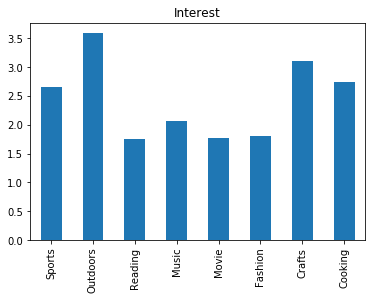

In [154]:
## 平均値
Effective_mean = Effective_ad.describe().loc['mean']
Effective_mean.iloc[1:9].plot(kind='bar', title='Interest');

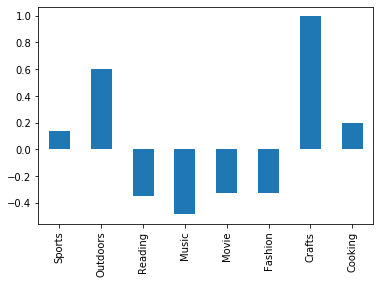

In [155]:
## 広告の効果があったユーザと全体的なユーザの興味の差
(Effective_mean.iloc[1:9] - mean.iloc[1:9]).plot(kind='bar');

In [156]:
## 広告の効果がなかったユーザについて分析を行う

UnEffective_ad = df[df['isAd'] == 0]
UnEffective_ad

,UserID,Gender,Age,Sports,Outdoors,Reading,Music,Movie,Fashion,Crafts,Cooking,Amount,isAd
0,U000001,M,44,3,5,2,1,1,1,5,3,21000,0
1,U000003,F,29,4,5,1,3,1,2,2,1,41000,0
2,U000004,M,37,2,1,3,3,3,1,1,5,3000,0
3,U000005,F,37,3,5,1,1,2,2,5,2,27000,0
4,U000006,F,29,1,1,3,3,3,5,1,1,103000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3098,U003524,F,30,1,1,3,3,3,5,1,1,209000,0
3099,U003525,F,36,2,5,2,1,1,1,5,3,66000,0
3100,U003526,F,47,2,1,3,3,3,1,1,5,2000,0
3101,U003527,M,23,1,1,3,3,3,5,1,1,195000,0


In [157]:
## データ全体に対しての統計値

UnEffective_ad.describe()

,Age,Sports,Outdoors,Reading,Music,Movie,Fashion,Crafts,Cooking,Amount,isAd
count,2786.000000,2786.000000,2786.000000,2786.000000,2786.000000,2786.000000,2786.000000,2786.000000,2786.000000,2786.000000,2786.0
mean,34.801149,2.500718,2.918880,2.147882,2.610194,2.135319,2.167265,2.002513,2.526920,47899.497487,0.0
std,7.233719,1.547164,1.848059,0.958581,0.826984,0.970662,1.641260,1.558780,1.556417,55928.159418,0.0
min,13.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1000.000000,0.0
25%,29.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,8000.000000,0.0
50%,35.000000,2.000000,2.000000,2.000000,3.000000,2.000000,1.000000,1.000000,2.000000,25000.000000,0.0
75%,40.000000,4.000000,5.000000,3.000000,3.000000,3.000000,4.000000,2.000000,4.000000,78000.000000,0.0
max,56.000000,5.000000,5.000000,4.000000,4.000000,4.000000,5.000000,5.000000,5.000000,525000.000000,0.0


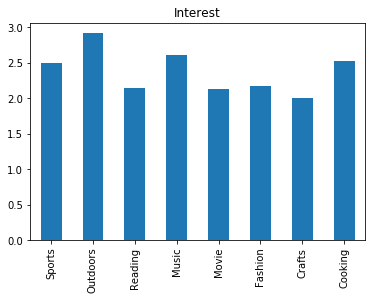

In [158]:
## 平均値
UnEffective_mean = UnEffective_ad.describe().loc['mean']
UnEffective_mean.iloc[1:9].plot(kind='bar', title='Interest');

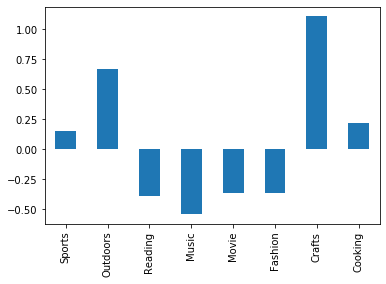

In [159]:
## 広告の効果があったユーザと広告の効果がなかったユーザの興味の差
(Effective_mean.iloc[1:9] - UnEffective_mean.iloc[1:9]).plot(kind='bar');

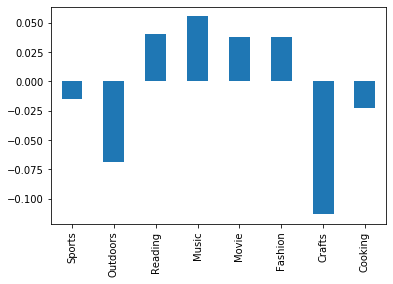

In [164]:
## 広告の効果がなかったユーザと全体的なユーザの興味の差
(UnEffective_mean.iloc[1:9] - mean.iloc[1:9]).plot(kind='bar');

上記結果から
広告の効果があるユーザは
* OutSportsへの関心・Craftsへの関心が高い
* Musicへの関心が低い

In [160]:
## 広告の効果があったユーザが購入する時期を考える
Effective_month = pd.merge(tran, Effective_ad['UserID'], on='UserID', how='inner')
Effective_month

,UserID,Month,Amount
0,U000021,11,2000
1,U000023,10,20000
2,U000025,02,3000
3,U000025,07,24000
4,U000034,04,3000
...,...,...,...
689,U003490,01,2000
690,U003490,02,10000
691,U003490,11,9000
692,U003495,04,34000


In [161]:
## データの確認作業
print('ユーザの人数')
Effective_month.nunique()['UserID'] == Effective_ad.nunique()['UserID']

ユーザの人数


True

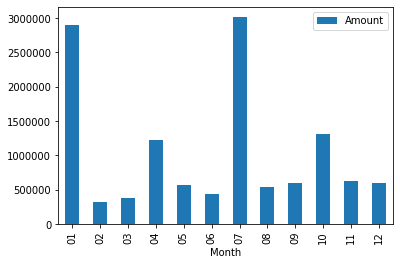

In [162]:
## 月ごとの購入額分析
Effective_month_sum = Effective_month.groupby('Month').sum()
Effective_month_sum.plot(y='Amount', kind='bar');

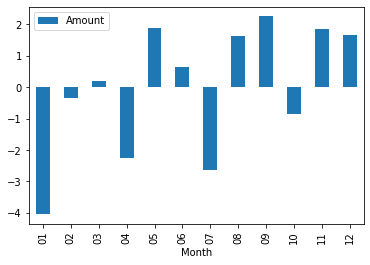

In [163]:
## 全ユーザの購入金額 月ごとの割合
tran_month_sum = tran.groupby('Month').sum()
tran_month_sum = tran_month_sum / tran_month_sum.sum() * 100

## 広告に効果があったユーザの購入金額 月ごとの割合
Effective_month_sum = Effective_month.groupby('Month').sum()
Effective_month_sum = Effective_month_sum / Effective_month_sum.sum() * 100


## 月ごとの割合の変化 
## + :  広告に効果があるユーザが購入しやすい月
## - :  広告に効果があるユーザが購入しにくい月
(Effective_month_sum - tran_month_sum).plot(y='Amount', kind='bar');

上記グラフは全体の人数と広告を利用している人数に差があるのであまり数値に大きな意味は持たない

## 結果
* 無効ユーザは約425人
* 前回は3103件の広告を配信し，約10%の人に効果があった

<br>

* ユーザ全体として1月と7月に購入金額が高くなる
* ユーザ全体としてOutsportsに興味があり，ReadingやCraftsに興味がない
* ユーザ全体の平均年齢は 35歳

<br>

* 広告に効果があったユーザは 特に **Outsports**や**Crafts**に，全体よりも興味があり，ReadingやMusicに興味がない
* 広告に効果があったユーザは 1月と7月に購入金額が高くなる
* 広告に効果があったユーザは　平均37歳

